In [609]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers

In [610]:
data = pd.read_csv('netflix.csv')
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
5,2002-05-31,1.078571,1.071429,1.078571,1.076429,8464400.0,1.076429
6,2002-06-03,1.149286,1.076429,1.080000,1.128571,3151400.0,1.128571
7,2002-06-04,1.140000,1.110714,1.135714,1.117857,3105200.0,1.117857
8,2002-06-05,1.159286,1.107143,1.110714,1.147143,1531600.0,1.147143
9,2002-06-06,1.232143,1.148571,1.150000,1.182143,2305800.0,1.182143


In [611]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973
4880,2021-10-11,639.419983,626.780029,633.200012,627.039978,2861200.0,627.039978


In [612]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [613]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229980,639.099976,3.234140e+08,639.099976


In [614]:
def missing_data(Data):
    missing_data_count = Data.isnull().sum()*100 / Data.shape[0]
    Data_missing_count = pd.DataFrame(missing_data_count).round(2)
    Data_missing_count = Data_missing_count.reset_index().rename(
               columns= {
                       'index': 'Column',
                        0 : 'Missing_Percentage',
               }
)
    Data_missing_value = Data.isnull().sum()
    Data_missing_value = Data_missing_value.reset_index().rename(
                columns= {
                    'index': 'Column',
                     0: 'Missing_Count',
                }
)
    Final = Data_missing_value.merge(Data_missing_count,how = 'inner', left_on = 'Column', right_on = 'Column')  
    Final = Final.sort_values(by = 'Missing_Count', ascending = False)
    return Final

missing_data(data)

,Column,Missing_Count,Missing_Percentage
0,Date,0,0.0
1,High,0,0.0
2,Low,0,0.0
3,Open,0,0.0
4,Close,0,0.0
5,Volume,0,0.0
6,Adj Close,0,0.0


In [615]:
len(data)

4881

In [616]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [617]:
data.shape

(4881, 6)

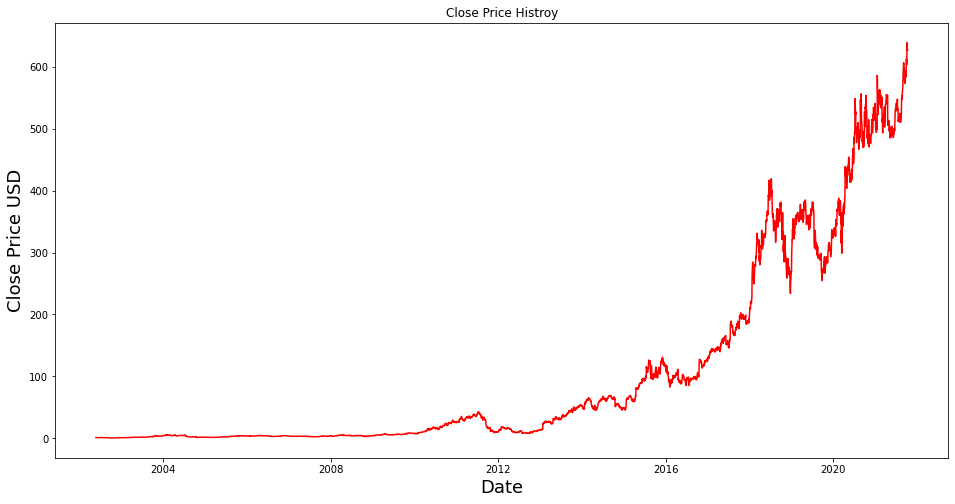

In [618]:
plt.figure(figsize= (16,8))
plt.title("Close Price Histroy")
plt.plot(data['Close'],color = "red")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [619]:
Stock_price = pd.DataFrame(data['Close']).rename(columns = { 'Close' : 'Price'})
Stock_price.head(10)

,Price
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
2002-05-31,1.076429
2002-06-03,1.128571
2002-06-04,1.117857
2002-06-05,1.147143


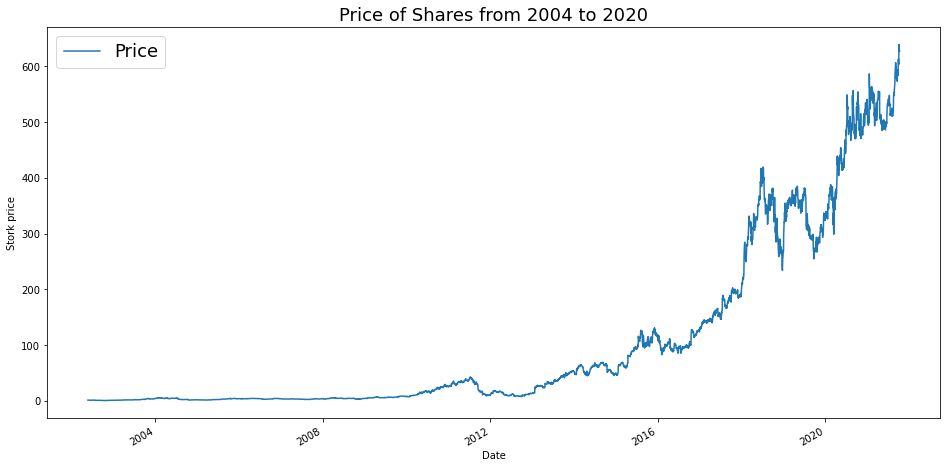

In [620]:
Stock_price.plot(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Stork price')
plt.title("Price of Shares from 2004 to 2020", fontsize=18)
plt.legend(fontsize = 18)

In [621]:
timesteps = Stock_price.index.to_numpy()
prices = Stock_price["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2002-05-23T00:00:00.000000000', '2002-05-24T00:00:00.000000000',
        '2002-05-28T00:00:00.000000000', '2002-05-29T00:00:00.000000000',
        '2002-05-30T00:00:00.000000000', '2002-05-31T00:00:00.000000000',
        '2002-06-03T00:00:00.000000000', '2002-06-04T00:00:00.000000000',
        '2002-06-05T00:00:00.000000000', '2002-06-06T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1.19642901, 1.21000004, 1.157143  , 1.10357106, 1.07142901,
        1.07642901, 1.12857103, 1.11785698, 1.14714301, 1.18214297]))

In [622]:
spilt_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:spilt_size], prices[:spilt_size]
X_test, y_test = timesteps[spilt_size:], prices[spilt_size:]
len(X_train),len(y_train),len(X_test),len(y_test)


(3904, 3904, 977, 977)

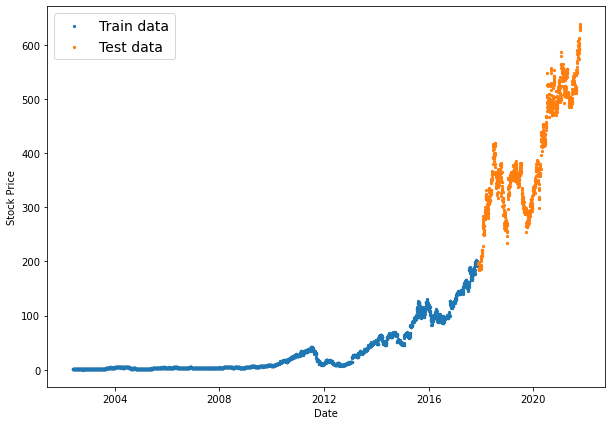

In [623]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend(fontsize=14)
plt.show();

In [624]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

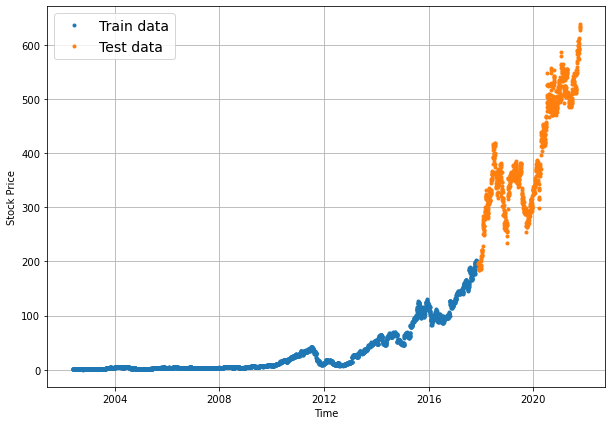

In [625]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [626]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [627]:
def get_labelled_windows(x, horizon=1):
      
  return x[:, :-horizon], x[:, -horizon:]

In [628]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [629]:
def make_windows(x, window_size=7, horizon=1):
      
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [630]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4851, 4851)

In [631]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.19642901 1.21000004 1.157143   1.10357106 1.07142901 1.07642901
 1.12857103 1.11785698 1.14714301 1.18214297 1.11857104 1.15642905
 1.15357101 1.092857   1.08285701 0.98642898 0.92214298 0.91071397
 0.95142901 0.95714301 0.97928602 0.978571   0.96428603 0.98857099
 0.94357097 0.999286   1.02785695 1.17285705 1.21428597 1.27642906] -> Label: [1.17571402]
Window: [1.21000004 1.157143   1.10357106 1.07142901 1.07642901 1.12857103
 1.11785698 1.14714301 1.18214297 1.11857104 1.15642905 1.15357101
 1.092857   1.08285701 0.98642898 0.92214298 0.91071397 0.95142901
 0.95714301 0.97928602 0.978571   0.96428603 0.98857099 0.94357097
 0.999286   1.02785695 1.17285705 1.21428597 1.27642906 1.17571402] -> Label: [1.16071403]
Window: [1.157143   1.10357106 1.07142901 1.07642901 1.12857103 1.11785698
 1.14714301 1.18214297 1.11857104 1.15642905 1.15357101 1.092857
 1.08285701 0.98642898 0.92214298 0.91071397 0.95142901 0.95714301
 0.97928602 0.978571   0.96428603 0.98857099 0.94357097 0.9

In [632]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [547.58001709 550.11999512 558.91998291 566.17999268 569.19000244
 582.07000732 588.54998779 590.5300293  606.71002197 606.04998779
 597.53997803 598.7199707  589.28997803 577.76000977 582.86999512
 586.5        589.34997559 575.42999268 573.14001465 590.65002441
 593.26000977 592.39001465 592.64001465 583.84997559 599.05999756
 610.34002686 613.15002441 603.34997559 634.80999756 639.09997559] -> Label: [631.84997559]
Window: [550.11999512 558.91998291 566.17999268 569.19000244 582.07000732
 588.54998779 590.5300293  606.71002197 606.04998779 597.53997803
 598.7199707  589.28997803 577.76000977 582.86999512 586.5
 589.34997559 575.42999268 573.14001465 590.65002441 593.26000977
 592.39001465 592.64001465 583.84997559 599.05999756 610.34002686
 613.15002441 603.34997559 634.80999756 639.09997559 631.84997559] -> Label: [632.65997314]
Window: [558.91998291 566.17999268 569.19000244 582.07000732 588.54998779
 590.5300293  606.71002197 606.04998779 597.53997803 598.7199707
 589.289

In [633]:
def mean_absolute_scaled_error(y_true, y_pred):
      mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
      mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)
      return mae / mae_naive_no_season

In [634]:
def evaluate_preds(y_true, y_pred):
      # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [635]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [636]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3880, 971, 3880, 971)

In [637]:
train_windows[:5], train_labels[:5]

(array([[1.19642901, 1.21000004, 1.157143  , 1.10357106, 1.07142901,
         1.07642901, 1.12857103, 1.11785698, 1.14714301, 1.18214297,
         1.11857104, 1.15642905, 1.15357101, 1.092857  , 1.08285701,
         0.98642898, 0.92214298, 0.91071397, 0.95142901, 0.95714301,
         0.97928602, 0.978571  , 0.96428603, 0.98857099, 0.94357097,
         0.999286  , 1.02785695, 1.17285705, 1.21428597, 1.27642906],
        [1.21000004, 1.157143  , 1.10357106, 1.07142901, 1.07642901,
         1.12857103, 1.11785698, 1.14714301, 1.18214297, 1.11857104,
         1.15642905, 1.15357101, 1.092857  , 1.08285701, 0.98642898,
         0.92214298, 0.91071397, 0.95142901, 0.95714301, 0.97928602,
         0.978571  , 0.96428603, 0.98857099, 0.94357097, 0.999286  ,
         1.02785695, 1.17285705, 1.21428597, 1.27642906, 1.17571402],
        [1.157143  , 1.10357106, 1.07142901, 1.07642901, 1.12857103,
         1.11785698, 1.14714301, 1.18214297, 1.11857104, 1.15642905,
         1.15357101, 1.092857  ,

In [638]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [639]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

In [640]:
import tensorflow as tf
from keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
31/31 [==============================] - 2s 28ms/step - loss: 4.8485 - mae: 4.8485 - val_loss: 22.2604 - val_mae: 22.2604
Epoch 2/100
31/31 [==============================] - 1s 32ms/step - loss: 2.0465 - mae: 2.0465 - val_loss: 18.1009 - val_mae: 18.1009
Epoch 3/100
31/31 [==============================] - 2s 60ms/step - loss: 1.7471 - mae: 1.7471 - val_loss: 15.1668 - val_mae: 15.1668
Epoch 4/100
31/31 [==============================] - 2s 54ms/step - loss: 1.5059 - mae: 1.5059 - val_loss: 13.9519 - val_mae: 13.9519
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 1.3749 - mae: 1.3749 - val_loss: 14.1899 - val_mae: 14.1899
Epoch 6/100
31/31 [==============================] - 1s 32ms/step - loss: 1.3269 - mae: 1.3269 - val_loss: 12.3041 - val_mae: 12.3041
Epoch 7/100
31/31 [==============================] - 1s 34ms/step - loss: 1.2272 - mae: 1.2272 - val_loss: 11.9308 - val_mae: 11.9308
Epoch 8/100
31/31 [==============================] - 2s 52ms/st

In [641]:
model_1.evaluate(test_windows, test_labels)

31/31 [==============================] - 0s 3ms/step - loss: 7.7349 - mae: 7.7349


[7.734905242919922, 7.734905242919922]

In [642]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

31/31 [==============================] - 1s 3ms/step - loss: 7.5204 - mae: 7.5204


[7.520394802093506, 7.520394802093506]

In [643]:
def make_preds(model, input_data):
    
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [644]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

31/31 [==============================] - 0s 3ms/step


(971,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([189.26668, 188.83229, 184.7686 , 185.24884, 184.81773, 186.13956,
        187.7444 , 188.75085, 186.95326, 187.95532], dtype=float32)>)

In [645]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 7.5203953,
 'mse': 112.49613,
 'rmse': 10.60642,
 'mape': 1.9601386,
 'mase': 1.0698484}

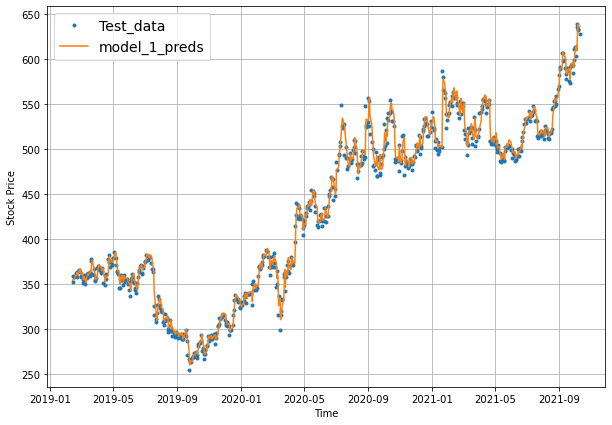

In [646]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

In [647]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30

In [648]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4851, 4851)

In [649]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [650]:
model_2.evaluate(test_windows, test_labels)

31/31 [==============================] - 0s 4ms/step - loss: 7.4651


7.4650774002075195

In [651]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

31/31 [==============================] - 1s 6ms/step - loss: 7.4651


7.4650774002075195

In [652]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

31/31 [==============================] - 1s 9ms/step


In [653]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 7.465078,
 'mse': 110.07766,
 'rmse': 10.49179,
 'mape': 1.9415684,
 'mase': 1.061979}

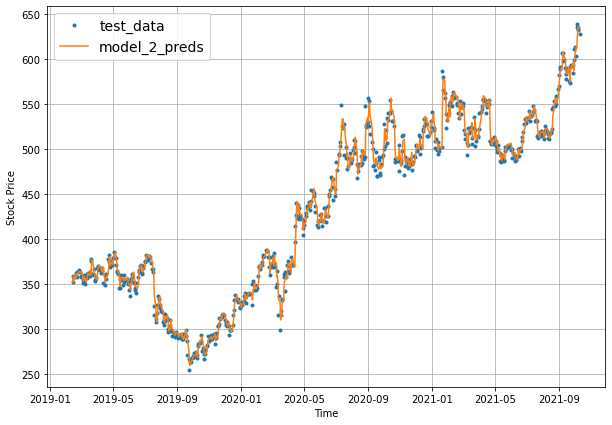

In [654]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [655]:
block_reward_1 = 100
block_reward_2 = 50 
block_reward_3 = 25
block_reward_4 = 12.5

block_reward_2_datetime = np.datetime64("2004-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2022-01-19")

In [656]:
block_reward_2_days = (block_reward_3_datetime - Stock_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - Stock_price.index[0]).days
block_reward_2_days, block_reward_3_days

(5161, 7181)

In [657]:
Netflix_prices_block = Stock_price.copy()
Netflix_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
Netflix_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
Netflix_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
Netflix_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
Netflix_prices_block.head()

,Price,block_reward
Date,,
2002-05-23,1.196429,50
2002-05-24,1.210000,50
2002-05-28,1.157143,50
2002-05-29,1.103571,50
2002-05-30,1.071429,50


In [658]:
Netflix_prices_windowed = Netflix_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  Netflix_prices_windowed[f"Price+{i+1}"] = Netflix_prices_windowed["Price"].shift(periods=i+1)
Netflix_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,Price+8,...,Price+21,Price+22,Price+23,Price+24,Price+25,Price+26,Price+27,Price+28,Price+29,Price+30
Date,,,,,,,,,,,,,,,,,,,,,
2002-05-23,1.196429,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-24,1.210000,50,1.196429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-28,1.157143,50,1.210000,1.196429,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-29,1.103571,50,1.157143,1.210000,1.196429,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-30,1.071429,50,1.103571,1.157143,1.210000,1.196429,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-05-31,1.076429,50,1.071429,1.103571,1.157143,1.210000,1.196429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-03,1.128571,50,1.076429,1.071429,1.103571,1.157143,1.210000,1.196429,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-04,1.117857,50,1.128571,1.076429,1.071429,1.103571,1.157143,1.210000,1.196429,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-06-05,1.147143,50,1.117857,1.128571,1.076429,1.071429,1.103571,1.157143,1.210000,1.196429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [659]:
X_all = Netflix_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = Netflix_prices_windowed.dropna()["Price"].to_numpy()

In [660]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [661]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_3.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [662]:
INTO_FUTURE = 1

In [663]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
      
    future_forecast = []
    last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
    for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
     future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
    return future_forecast

In [664]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_3,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 1s 958ms/step
Predicting on: 
 [566.17999268 569.19000244 582.07000732 588.54998779 590.5300293
 606.71002197 606.04998779 597.53997803 598.7199707  589.28997803
 577.76000977 582.86999512 586.5        589.34997559 575.42999268
 573.14001465 590.65002441 593.26000977 592.39001465 592.64001465
 583.84997559 599.05999756 610.34002686 613.15002441 603.34997559
 634.80999756 639.09997559 631.84997559 632.65997314 627.03997803] -> Prediction: 577.365234375



In [665]:
future_forecast[:10]

[577.36523]

In [666]:
def get_future_dates(start_date, into_future, offset=1):
      
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [667]:
last_timestep = Stock_price.index[-1]
last_timestep

Timestamp('2021-10-11 00:00:00')

In [668]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-10-12'], dtype='datetime64[D]')

In [669]:
import csv
from datetime import datetime

timesteps = []
Netflix_price = []
with open("./netflix.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(data.index[-1]) # get the dates as dates (not strings), strptime = string parse time
    Netflix_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], Netflix_price[:10]

([Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00'),
  Timestamp('2021-10-11 00:00:00')],
 [1.1457140445709229,
  1.1971429586410522,
  1.157142996788025,
  1.0857139825820923,
  1.0714290142059326,
  1.0714290142059326,
  1.076429009437561,
  1.1107139587402344,
  1.1071430444717407,
  1.1485710144042969])

In [670]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0,  Netflix_price[-1])
next_time_steps, future_forecast

(array(['2021-10-11', '2021-10-12'], dtype='datetime64[D]'),
 array([626.78   , 577.36523], dtype=float32))

In [671]:
Stock_price.shape

(4881, 1)

In [672]:
next_time_steps

array(['2021-10-11', '2021-10-12'], dtype='datetime64[D]')

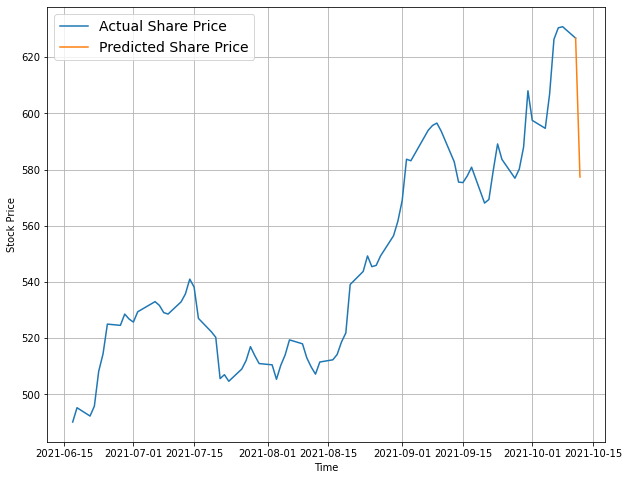

In [673]:
plt.figure(figsize=(10, 8))
plot_time_series(Stock_price.index, Netflix_price, start=4800, format="-", label="Actual Share Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted Share Price")